<h2> Summary <h2>
<ul>
    <li>Part 1 :Classification and Regression</li> 
    <li>Part 2 :Reduction of dimensions</li>   
</ul>

<h3>Part 1 : classification and regression </h3>
<ul>
    <li>LinearRegression </li> 
    <li>Multi-LinearRegression </li> 
    <li>Random Forest and Decision Tree</li> 
    <li>SVM</li>
    <li>ROC </li>
    <li>SVC </li>
</ul>

In [1]:
# boston csv

In [4]:
#importation des bib 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,roc_curve, auc
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [5]:
#boston dataset

In [6]:
bs = pd.read_csv('boston.csv')
bs.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


--> The dataset is small and contains information about housing in the suburbs of Boston.

In [7]:
#Multi- LinearRegression
Y=bs['MEDV']
X = bs.drop('MEDV',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#time to apply  Multi-LinearRegression()--------
model = LinearRegression()
model.fit(X_train,y_train)
y_pridct=model.predict(X_test)
#performance--------------

print("MSE lineaire= ", mean_squared_error(y_test,y_pridct))
print("R squared lineaire = ", r2_score(y_test,y_pridct))

MSE lineaire=  22.777708563866078
R squared lineaire =  0.6893967884614756


 
<p style='background-color: #f20553; border: 1px solid #333333; border-radius: 3px 3px 3px 3px; box-shadow: 0 0 1px #93291b inset; color: #f5f5f5; padding: 5px;'> - with Multi-linear Regression it seems like that our model is good with Accuracy=0.68 & MSE=22 </p>

In [8]:
#Linear regression
# Select one feature as independent variable
X = bs[['RM']]  # Example: 'RM' is the average number of rooms per dwelling

# Target variable
Y = bs['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Apply Simple Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
#performance--------------

print("MSE lineaire= ", mean_squared_error(y_test,y_pridct))
print("R squared lineaire = ", r2_score(y_test,y_pridct))

MSE lineaire=  22.777708563866078
R squared lineaire =  0.6893967884614756


 
<p style='background-color: #f20553; border: 1px solid #333333; border-radius: 3px 3px 3px 3px; box-shadow: 0 0 1px #93291b inset; color: #f5f5f5; padding: 5px;'> - with linear Regression it seems like that our model is good with Accuracy=0.68 & MSE=22 </p>

In [9]:
# Decision Tree
Y=bs['MEDV']
X = bs.drop('MEDV',axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
decision_tree_model = DecisionTreeRegressor(random_state=42)
# Decision tree
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluate performance
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
print("mse decision_tree= ", mse_decision_tree)
print("mse random_forest = ", mse_random_forest)

mse decision_tree=  8.979803921568626
mse random_forest =  8.008326509803926


Since the Random Forest MSE is lower, it suggests that the Random Forest model is providing a more accurate prediction on the test set compared to the Decision Tree model.

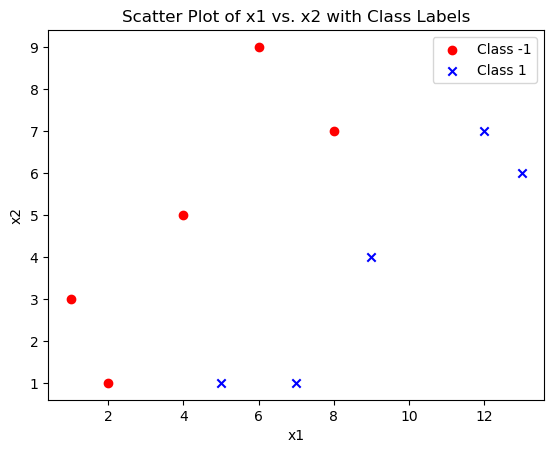

In [10]:
#SVM
x1 = [1, 2, 4, 6, 8, 5, 7, 9, 12, 13]
x2 = [3, 1, 5, 9, 7, 1, 1, 4, 7, 6]
y = [-1, -1, -1, -1, -1, 1, 1, 1, 1, 1]

# Separate data points into two groups based on class labels
x1_class_minus_1 = [x1[i] for i in range(len(y)) if y[i] == -1]
x2_class_minus_1 = [x2[i] for i in range(len(y)) if y[i] == -1]
x1_class_1 = [x1[i] for i in range(len(y)) if y[i] == 1]
x2_class_1 = [x2[i] for i in range(len(y)) if y[i] == 1]

# Create a scatter plot with different colors for each class
plt.scatter(x1_class_minus_1, x2_class_minus_1, label='Class -1', color='red', marker='o')
plt.scatter(x1_class_1, x2_class_1, label='Class 1', color='blue', marker='x')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot of x1 vs. x2 with Class Labels')
plt.legend()

plt.show()

In [11]:
df = pd.read_csv('diabetes.csv')

In [12]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


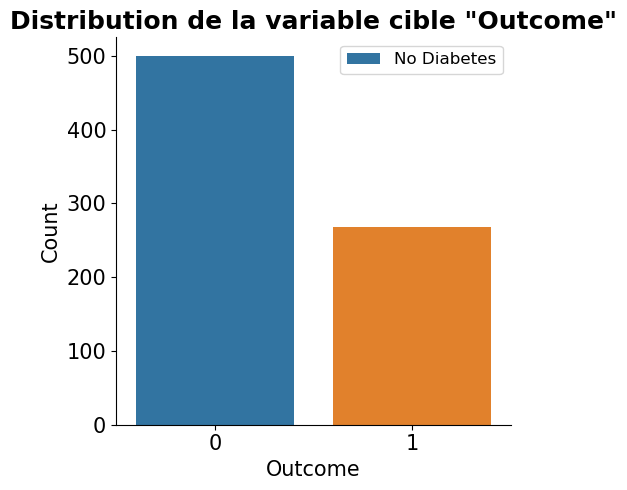

<Axes: xlabel='Outcome', ylabel='Age'>

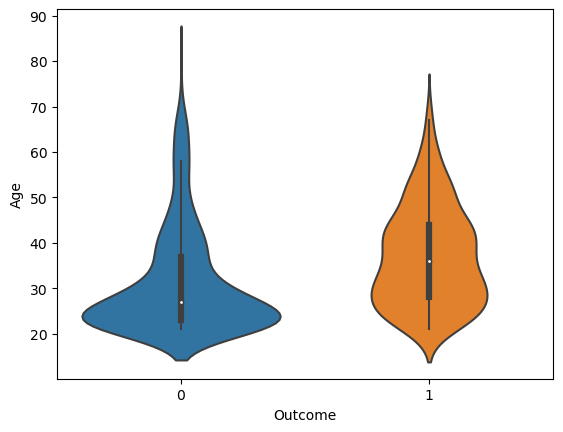

In [14]:


# Comptez les occurrences de chaque classe dans la variable 'Outcome'
class_counts = df['Outcome'].value_counts()

# Créez le graphique de distribution des classes en spécifiant l'ordre des classes
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='Outcome', order=[0, 1], label='Count')

# Ajoutez une légende et les noms des classes
plt.legend(labels=['No Diabetes', 'Diabetes'], fontsize=12)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Count', size=15)
plt.xlabel('Outcome', size=15)

# Supprimez la bordure supérieure (despine)
sns.despine(top=True)

# Ajoutez un titre informatif
plt.title('Distribution de la variable cible "Outcome"', size=18, weight='bold')

# Sauvegardez le graphique en tant qu'image
plt.tight_layout()
plt.savefig('Class-distribution.png')
plt.show()  # Affiche le graphique à l'écran

sns.violinplot(x='Outcome', y='Age', data=df)

In [15]:
target_name=df['Outcome']
x= df.drop('Outcome',axis=1)
X_train, X_test, y_train, y_test= train_test_split(x,target_name,test_size=0.2,random_state=0)

In [16]:
# Creating the SVM model.
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7922077922077922


In [18]:
#svm & svc 
# logistic regression for multi-class classification using built-in one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define model
model = LogisticRegression(multi_class='ovr')
# fit model
model.fit(x, target_name)
# make predictions
yhat = model.predict(x)

C:\Users\Houssem Ghediri\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
#scalling data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [20]:
#SVM requiest feature scaling
svc = SVC(C=1000, gamma='auto').fit(X_train_scaled, y_train)
y_pred=svc.predict(X_test_scaled)

print("Accuracy on train: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred, y_test)))

Accuracy on train: 0.800
Accuracy on test: 0.773


<p>The training accuracy achieved a commendable 80%, indicating effective learning from the training dataset. However, the observed drop in test accuracy to 77.3% suggests potential overfitting</p>

In [21]:
#ROC Visualization

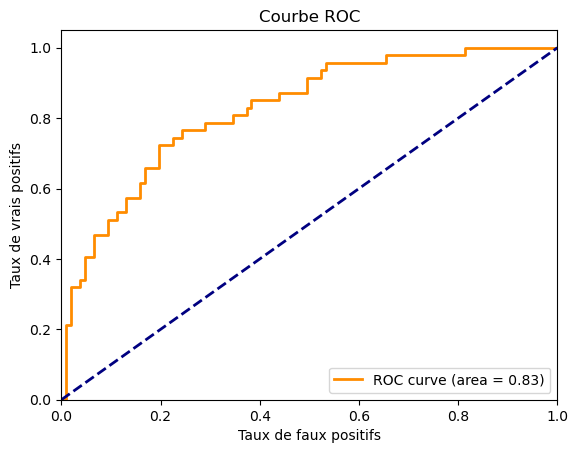

In [22]:
# Calcule les taux de faux positifs et vrais positifs
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test_scaled))

# Calcule la zone sous la courbe ROC (AUC)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()


In [23]:
iris = datasets.load_iris()

In [24]:
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

In [25]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [26]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  70.00
F1 (Polynomial Kernel):  69.67


In [27]:
#In the same way, the accuracy and f1 scores for SVM with RBF kernel:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  76.67
F1 (RBF Kernel):  76.36


<h3>Part 2 : Facial recognition</h3>
<ul>
    <li>PCA : principal component analysis </li>
    <li>K-means </li>
    <li>LDA : Linear Discriminant Analysis</li> 
    <li>SVM : support vector machine </li>  
</ul>

<p>The Yale Face Database is a dataset commonly used in the field of computer vision and facial recognition</p>

In [28]:
yale_face=fetch_lfw_people(min_faces_per_person=2,resize=0.4)
X = yale_face.data
Y = yale_face.target
data=yale_face.data
target_names = yale_face.target_names

# Print some information about the dataset
print("Number of samples:", data.shape[0])
print("Number of features:", data.shape[1])
print("name of classes:", target_names)

Number of samples: 8773
Number of features: 1850
name of classes: ['Aaron Peirsol' 'Aaron Sorkin' 'Abdel Nasser Assidi' ... 'Zhu Rongji'
 'Zico' 'Zinedine Zidane']


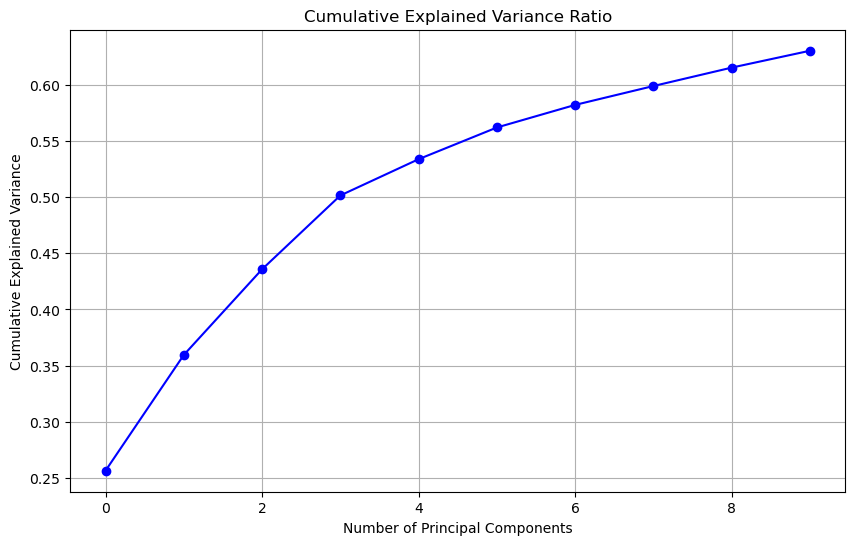

In [29]:
# Principal Component Analysis (PCA) : is utilized for dimensionality reduction

n_components = 10  # You can choose the number of components based on your requirements
pca = PCA(n_components=n_components, whiten=True).fit(X)

# Transform the data
X_pca = pca.transform(X)

# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

<p>The plot helps in deciding the optimal number of principal components based on the desired level of variance retention. In general, one aims to retain a sufficiently high proportion of variance while reducing the dimensionality of the data.</p>

C:\Users\Houssem Ghediri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Houssem Ghediri\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Houssem Ghediri\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


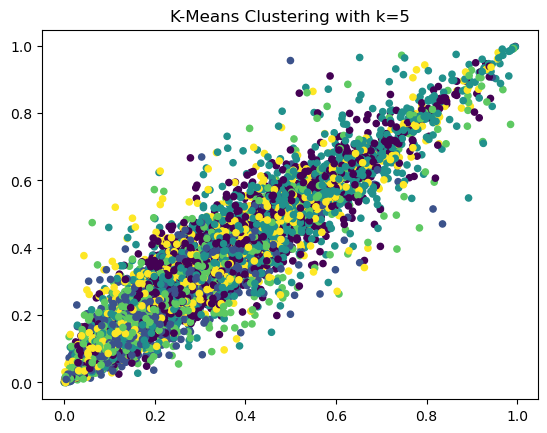

In [30]:
#K-means :
#In this code snippet, the K-means clustering algorithm is applied to the data. The variable nbK is set to 5, indicating the desired number of clusters
nbK=5
# Create a KMeans model with k clusters
kmeans = KMeans(n_clusters=nbK, random_state=42)
# Fit the model to the data
kmeans.fit(X)

# Get cluster labels for each sample
labels = kmeans.labels_

# Visualize the clusters (assuming 2D data for simplicity)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=20)
plt.title(f'K-Means Clustering with k={nbK}')
plt.show()


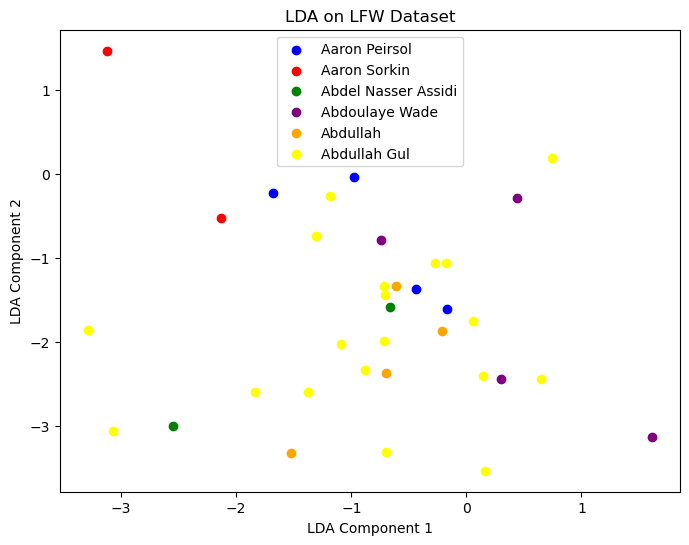

In [31]:
#LDA : Linear Discriminant Analysis (LDA) is employed for dimensionality reduction.

# Number of components (dimensions) to reduce to
n_components = 2

# Create an LDA model with the specified number of components
lda = LinearDiscriminantAnalysis(n_components=n_components)

# Fit the model to the data
X_lda = lda.fit_transform(X, Y)

# Visualize the LDA results
plt.figure(figsize=(8, 6))

for i, c in zip(range(len(target_names)), ['blue', 'red', 'green', 'purple', 'orange','yellow']):
    plt.scatter(X_lda[Y == i, 0], X_lda[Y == i, 1], c=c, label=target_names[i])

plt.title('LDA on LFW Dataset')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()
plt.show()

<p>    Each class is represented by a different color (blue, red, green, purple, orange, yellow).
    The x-axis corresponds to the first LDA component, and the y-axis corresponds to the second LDA component.

The legend in the plot indicates the correspondence between colors and target names. This visualization helps in understanding how well the LDA algorithm separates the classes in the reduced-dimensional space.</p>

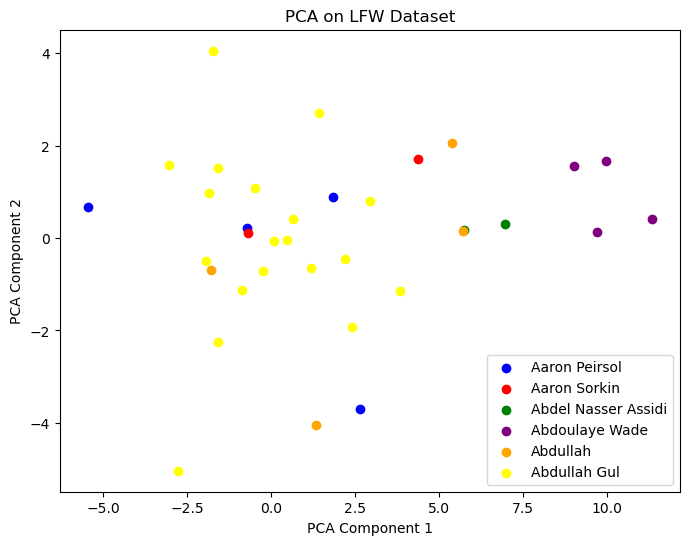

In [34]:
from sklearn.decomposition import PCA
# Number of components (dimensions) to reduce to
n_components_pca = 2

# Create a PCA model with the specified number of components
pca = PCA(n_components=n_components_pca)

# Fit the model to the data
X_pca = pca.fit_transform(X)

# Visualize the PCA results
plt.figure(figsize=(8, 6))

for i, c in zip(range(len(target_names)), ['blue', 'red', 'green', 'purple', 'orange','yellow']):
    plt.scatter(X_pca[Y == i, 0], X_pca[Y == i, 1], c=c, label=target_names[i])

plt.title('PCA on LFW Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

<p>The main goal of PCA is to transform the original features of a dataset into a new set of uncorrelated features, called principal components</p>

In [35]:
# Assuming X_pca and X_lda are the transformed data after PCA and LDA
# Also assuming Y is the target variable

# Split the data into training and testing sets
X_train_pca, X_test_pca, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)
X_train_lda, X_test_lda, _, _ = train_test_split(X_lda, Y, test_size=0.2, random_state=42)

# Create SVM classifiers for PCA and LDA
svm_pca = SVC(kernel='linear')
svm_lda = SVC(kernel='linear')

# Fit the SVM models on the training data
svm_pca.fit(X_train_pca, Y_train)
svm_lda.fit(X_train_lda, Y_train)

# Make predictions on the testing data
predictions_pca = svm_pca.predict(X_test_pca)
predictions_lda = svm_lda.predict(X_test_lda)

# Evaluate the performance of the SVM models
accuracy_pca = accuracy_score(Y_test, predictions_pca)
accuracy_lda = accuracy_score(Y_test, predictions_lda)

print("Accuracy of SVM with PCA:", accuracy_pca)
print("Accuracy of SVM with LDA:", accuracy_lda)

Accuracy of SVM with PCA: 0.05242165242165242
Accuracy of SVM with LDA: 0.150997150997151


<p>as you see that the data is huge , in this case we take just 6 targets with component 2 for PCA AND 5 for LDA : component can be change and target also </p>

<p> and we noticed that the accuracy of the two algorithm is to low for the reduction then separate of the class exist</p>